# Описание

На этот раз данные имеют следующую структуру:

* записываются для каждого пользователя, совершившего покупки, каждый день
* для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
* внутри каждой папки есть файл data.csv, где и хранятся данные

Схематично выглядит так:
```
└── data
   ├── 2020-12-30   
   │  ├── FirstName_LastName1   
   │  │   └── data.csv  
   │  ├── FirstName_LastName2   
   │  │   └── data.csv  
   │  └── FirstName_LastName3   
   │      └── data.csv   
   └── 2020-12-31   
      ├── FirstName_LastName1      
      │   └── data.csv      
      └── FirstName_LastName5      
          └── data.csv
```      
Например, 30 декабря три покупателя сделали покупки, 31 – два 
(папки 2020-12-30 и 2020-12-31 соответственно). Поскольку клиент FirstName_LastName1 купил товары в оба дня, для него имеется папка в папке для каждой из дат. Для других клиентов – по одной.

**Note: данные в задании покрывают другой временной период, имена тоже другие. Подробности, примеры и возможные подсказки можно найти в текстах следующих шагов.**

      

## Задачи
1. Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)
2. Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.
3. Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?
4. Визуализируйте продажи по дням.
5. Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

**Соберем все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), имя пользователя (name), и дату этих покупок (date), соответствует названию папки, где лежит папка с пользователем).**

In [126]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [103]:
root_path = 'data'
data_files = []
target_file = 'data.csv'
tree = os.walk(root_path)
for item in tree:
    files = item[-1]
    if len(files) > 0 and target_file in files:
        path = os.path.join(item[0], targer_file)
        data_files.append(path)
data_files

['data/2020-12-06/Vasiliy_Fedorov/data.csv',
 'data/2020-12-08/Alexey_Fedorov/data.csv',
 'data/2020-12-08/Anton_Smirnov/data.csv',
 'data/2020-12-08/Kirill_Smirnov/data.csv',
 'data/2020-12-08/Rostislav_Petrov/data.csv',
 'data/2020-12-08/Petr_Petrov/data.csv',
 'data/2020-12-09/Anton_Ivanov/data.csv',
 'data/2020-12-09/Anton_Smirnov/data.csv',
 'data/2020-12-09/Rostislav_Petrov/data.csv',
 'data/2020-12-09/Petr_Fedorov/data.csv',
 'data/2020-12-09/Alexey_Smirnov/data.csv',
 'data/2020-12-09/Anton_Petrov/data.csv',
 'data/2020-12-09/Vasiliy_Ivanov/data.csv',
 'data/2020-12-07/Petr_Smirnov/data.csv',
 'data/2020-12-07/Anton_Ivanov/data.csv',
 'data/2020-12-07/Rostislav_Fedorov/data.csv',
 'data/2020-12-07/Alexey_Fedorov/data.csv',
 'data/2020-12-07/Anton_Smirnov/data.csv',
 'data/2020-12-07/Petr_Fedorov/data.csv',
 'data/2020-12-07/Alexey_Smirnov/data.csv',
 'data/2020-12-07/Vasiliy_Ivanov/data.csv',
 'data/2020-12-07/Kirill_Fedorov/data.csv',
 'data/2020-12-07/Alexey_Ivanov/data.csv',

In [104]:
data_files_df = []

for path in data_files:
    df = pd.read_csv(path, index_col = 0)
    date, name = path.split('/')[1:3]
    df['date'] = date
    df['name'] = name
    data_files_df.append(df)
data = pd.concat(data_files_df, ignore_index = True)

In [105]:
data.head(10)

,product_id,quantity,date,name
0,56,4,2020-12-06,Vasiliy_Fedorov
1,97,3,2020-12-06,Vasiliy_Fedorov
2,79,3,2020-12-06,Vasiliy_Fedorov
3,29,5,2020-12-06,Vasiliy_Fedorov
4,73,5,2020-12-08,Alexey_Fedorov
5,34,1,2020-12-08,Alexey_Fedorov
6,71,1,2020-12-08,Alexey_Fedorov
7,18,2,2020-12-08,Alexey_Fedorov
8,67,2,2020-12-08,Alexey_Fedorov
9,6,5,2020-12-08,Anton_Smirnov


**Выясним, какой пользователь купил больше всего товаров.**

In [114]:
quantity_sum = data.groupby('name').agg({'quantity': 'sum'})
max_quantity = quantity_sum.values.max()
max_quantity

52

In [118]:
quantity_sum[quantity_sum['quantity'] == max_quantity].index.to_list()

['Alexey_Smirnov', 'Petr_Smirnov']

Ответ: `Alexey_Smirnov, Petr_Smirnov`

**Найдем топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot), где:**

* по оси x – идентификаторы товаров (product_id) 
* по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)

In [124]:
quantity_of_products = data.groupby('product_id', as_index = False).agg({'quantity': 'sum'})\
    .sort_values('quantity', ascending = False).head(10)
quantity_of_products

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


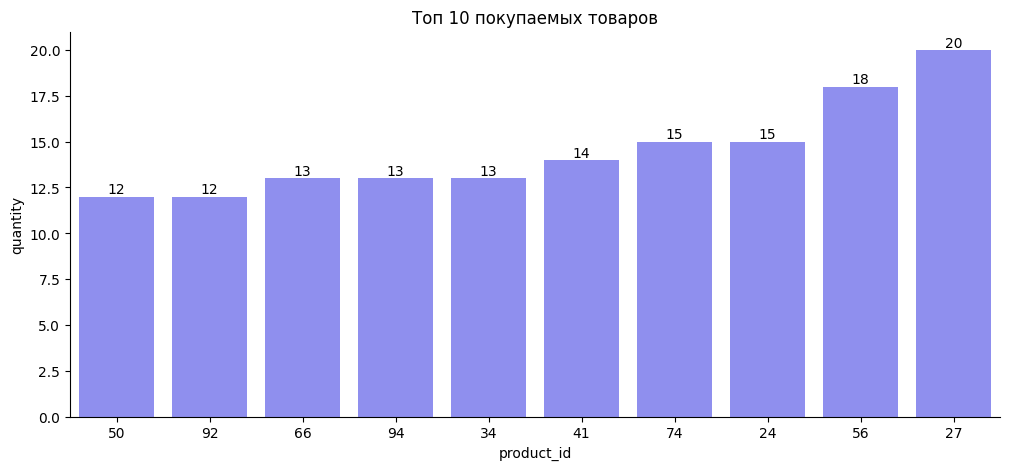

In [145]:
fig, ax = plt.subplots(figsize = (12,5))
ax = sns.barplot(data = quantity_of_products, x = 'product_id', y = 'quantity',\
                 color = 'blue', alpha = 0.5, order=quantity_of_products.product_id[::-1])
ax.bar_label(ax.containers[0])
ax.set_title("Топ 10 покупаемых товаров")
sns.despine()

**4. Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date)**

* **Максимальное число товаров было продано 4 декабря**
* **8 и 9 декабря было продано примерно одинаковое число товаров**
* **4 декабря было куплено почти в два раза больше товаров, чем в предыдущий день**
* **Меньше всего товаров было приобретено 6 декабря**

In [149]:
quantity_by_date = data.groupby('date', as_index = False).agg({'quantity':'sum'})


,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


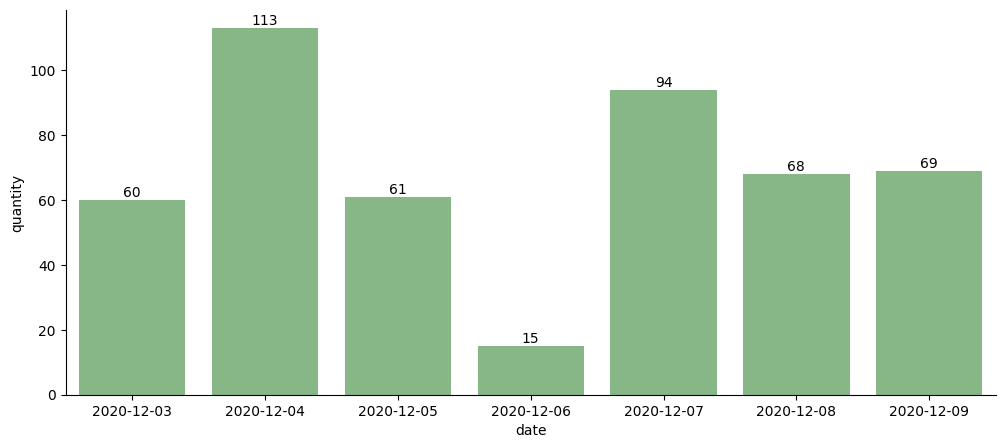

In [157]:
fig, ax = plt.subplots(figsize = (12, 5))
ax = sns.barplot(data = quantity_by_date, x = 'date', y = 'quantity', color = 'green', \
                 alpha = 0.5)
ax.bar_label(ax.containers[0])
sns.despine()

**Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни.**

In [174]:
same_product = data.groupby(['product_id', 'name']).date.nunique()
same_product

product_id  name             
0           Vasiliy_Ivanov       1
1           Alexey_Smirnov       1
3           Kirill_Fedorov       1
            Petr_Smirnov         1
4           Alexey_Smirnov       1
                                ..
95          Vasiliy_Ivanov       1
96          Petr_Smirnov         1
97          Vasiliy_Fedorov      1
99          Alexey_Fedorov       1
            Rostislav_Smirnov    1
Name: date, Length: 158, dtype: int64

In [179]:
same_product.loc[same_product > 1]

product_id  name        
15          Anton_Ivanov    2
94          Petr_Fedorov    2
Name: date, dtype: int64